<div align='center'><font size="7" color='#353B47'><b>Análise de séries temporais</b></font></div>
<div align='center'><font size="5" color="#353B47">Utilizando Redes neurais (RNN)</font></div>

## <div id="summary">Sumário</div>

<ol type="Sumário">
    <font size="4"><li><a href="#chap1">Introdução</a></li>
    <font size="4"><li><a href="#chap2">Dataset</a></li>
    <font size="4"><li><a href="#chap3">Tratamento dos dados</a></li>
    <font size="4"><li><a href="#chap4">Análise exploratória</a></li>
    <font size="4"><li><a href="#chap5">Construção do modelo LSTM</a></li>
    <font size="4"><li><a href="#chap6">Resultados</a></li>
</ol>

# <div id="chap1">1. Introdução </div>
<hr>
<div><font size ='3'>
    <p>&emsp;&emsp;Este Notebook tem como intuito demonstrar e documentar o desenvolvimento de um modelo de predição de consumo de energia no município de Florianópolis utilizando redes neurais recorrentes, mais especificamente LSTMs.</p>
    <p>&emsp;&emsp;Serão abordados temas como a obtenção do banco de dados utilizado e também a  limpeza, organização e padronização destes dados.</p>
    <p>&emsp;&emsp;Será feita uma análise exploratória da série temporal utilizando métodos clássicos estatísticos, juntamente com aplicação de modelos clássicos para fins de comparação e por fim avaliação de resultados</p>
</div>
    

<p><font size='4'><b>Bibliotecas utilizadas</b></p>
<hr/>
<ul><font size='3'>
  <li><a href="https://www.tensorflow.org/?hl=pt-br">Tensorflow</a></li>
  <li><a href="https://pandas.pydata.org/">Pandas</a></li>
  <li><a href="https://numpy.org/">NumPy</a></li>
  <li><a href="https://matplotlib.org/">Matplotlib</a></li>
  <li><a href="https://scikit-learn.org/">scikit-learn</a></li>
</ul>

In [1]:
#Importando os bibliotecas

import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# <div id="chap2">2. Dataset</div>
<hr>

<p><font size='3'>O dataset utilizado foi retirado da <a href="https://www.celesc.com.br/home/mercado-de-energia/dados-de-consumo">página de informações de mercado de energia da CELESC (Centrais Elétricas de Santa Catarina S.A.).</a> Ele é composto pelos seguintes dados:</p>

<ul><font size ='3'>
    <li> Número de unidades consumidoras atendidas por região
    <li> Consumo, em <b>MWh</b>, de energia elétrica por região
</ul>

<p><font size ='3'>Os dados tem frequência de amostragem de 30 dias, e o intervalo total é de **01/01/1994** à **01/09/2022**.</p>

<p><font size ='3'><a href="https://www.celesc.com.br/arquivos/geral/municipio_mensal.xlsx">Link direto para download</p>

In [2]:
#Importando o dataset

df = pd.read_excel('municipio_mensal.xlsx', sheet_name='Consumo MWh')

<p><font size = '3'>Com o dataset importado, utilizando a função <b><a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head'>head()</a></b> podemos ver os primeiros 10 itens de cada coluna, juntamenta a função <b><a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape'>shape()</a></b> para ver as dimensões do DataFrame.</p>

In [3]:
df.shape

(4512, 353)

<p><font size = '3'>Podemos observar então, que o DataFrame conta com 4512 linhas e 353 colunas. Abaixo é mostrado como ela está dividida.</p>

In [4]:
df.head(10)

,tipo,cod_muni,agência,núcleo,unidade,município,cod_classe,classe,1994-01-01 00:00:00,1994-02-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
0,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,1,Residencial,21357.147,20782.785,...,51207.82046,67805.186,72458.04394,71901.73800,54816.429,49513.315,51371.377,50536.92089,50106.64000,50833.496
1,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,2,Industrial,1698.383,1641.103,...,2976.46100,3743.179,3822.83400,3799.09100,3305.182,2963.088,2923.234,2894.99300,2877.98100,2860.292
2,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,3,Comercial,14766.175,13420.879,...,31813.04400,36778.731,40113.04500,39851.61500,35448.770,30309.031,27145.299,26488.54700,27398.64625,25944.034
3,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,4,Rural,25.908,23.863,...,42.85900,50.487,50.48700,49.42300,43.292,43.960,44.956,43.09200,44.89600,54.093
4,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,5,Poder Público,6393.112,4903.650,...,6690.84000,7521.586,8527.39900,8653.28200,8906.695,7159.980,6648.814,6152.60000,6417.01300,6340.768
5,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,6,Iluminação Pública,2513.127,2568.735,...,3182.78600,3307.835,3331.57000,3015.39300,3355.822,3237.200,3452.284,3281.90700,3605.18900,3525.253
6,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,7,Serviço Público,659.419,653.971,...,2840.97200,3340.023,3314.49200,2956.27800,3174.170,2881.616,3081.155,2628.84900,2735.45900,2822.698
7,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,8,Próprio,419.640,404.616,...,346.17300,419.065,502.88200,439.65800,460.417,372.993,295.365,259.84500,272.41600,265.046
8,Cativo,1101,ARFLO,Núcleo Grande Capital,Florianópolis (sede),Florianópolis,9,Revenda,0.000,0.000,...,0.00000,0.000,0.00000,0.00000,0.000,0.000,0.000,0.00000,0.00000,0.000
9,Cativo,1102,ARFLO,Núcleo Grande Capital,Florianópolis (sede),São José,1,Residencial,7482.370,6657.775,...,22181.04467,26037.616,28203.81981,28973.16798,22816.618,20837.235,21523.631,21099.49300,21298.87600,21263.456


# <div id="chap3">3. Tratamento dos dados</div>
<hr>

<p><font size='3'>Como nossa análise vai contemplar apenas o município de Florianópolis, podemos manter apenas a <i>coluna</i> <b>município = 'Florianópolis'</b> no DataFrame.</p><br>
<p><font size='3'>Também podemos retirar as colunas que não nos interessam, como:</p>
<ul>
    <li>tipo 
    <li>cod_muni
    <li>agência
    <li>núcleo
    <li>unidade
    <li>cod_classe
    <li>município (Após a filtragem)
</ul>

In [36]:
df = pd.read_excel('municipio_mensal.xlsx', sheet_name='Consumo MWh')
#Mantendo no DataFrame apenas os dados com município = Florianópolis
df = df.loc[df['município']=='Florianópolis']
#Removendo as colunas que não serão utilizadas em nossa análise
df = df.drop(columns=['tipo','cod_muni','agência','núcleo','unidade','cod_classe', 'município'])

df.head(10)

,classe,1994-01-01 00:00:00,1994-02-01 00:00:00,1994-03-01 00:00:00,1994-04-01 00:00:00,1994-05-01 00:00:00,1994-06-01 00:00:00,1994-07-01 00:00:00,1994-08-01 00:00:00,1994-09-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
0,Residencial,21357.147,20782.785,19920.442,19890.395,19409.539,20029.374,18449.182,17824.660,21078.597,...,51207.82046,67805.18600,72458.04394,71901.73800,54816.42900,49513.31500,51371.37700,50536.92089,50106.64000,50833.49600
1,Industrial,1698.383,1641.103,1744.840,1797.511,1669.668,1829.881,1727.951,1545.273,1895.187,...,2976.46100,3743.17900,3822.83400,3799.09100,3305.18200,2963.08800,2923.23400,2894.99300,2877.98100,2860.29200
2,Comercial,14766.175,13420.879,14324.136,12955.039,10762.104,10620.011,10209.671,9906.564,11228.961,...,31813.04400,36778.73100,40113.04500,39851.61500,35448.77000,30309.03100,27145.29900,26488.54700,27398.64625,25944.03400
3,Rural,25.908,23.863,25.417,25.898,24.958,24.585,22.323,21.720,36.874,...,42.85900,50.48700,50.48700,49.42300,43.29200,43.96000,44.95600,43.09200,44.89600,54.09300
4,Poder Público,6393.112,4903.650,4499.429,5233.793,4214.206,4632.583,3856.017,4024.602,5044.499,...,6690.84000,7521.58600,8527.39900,8653.28200,8906.69500,7159.98000,6648.81400,6152.60000,6417.01300,6340.76800
5,Iluminação Pública,2513.127,2568.735,3028.517,2626.243,2624.639,2647.882,2659.551,2670.446,2670.446,...,3182.78600,3307.83500,3331.57000,3015.39300,3355.82200,3237.20000,3452.28400,3281.90700,3605.18900,3525.25300
6,Serviço Público,659.419,653.971,635.643,632.509,601.464,574.817,598.423,549.799,583.066,...,2840.97200,3340.02300,3314.49200,2956.27800,3174.17000,2881.61600,3081.15500,2628.84900,2735.45900,2822.69800
7,Próprio,419.640,404.616,453.703,362.545,390.938,318.439,333.540,330.582,367.670,...,346.17300,419.06500,502.88200,439.65800,460.41700,372.99300,295.36500,259.84500,272.41600,265.04600
8,Revenda,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2670,Comercial,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,940.11372,1078.54236,945.58044,970.55952,793.78152,726.57732,656.99928,720.15048,680.28828,667.64712


In [37]:
#Utilizando a feature classe como ponto de pivotamento, assim tendo o DataFrame corretamente
#construido
df_floripa = df.melt(id_vars=['classe'])

#Renomeando as colunas restantes para refletir o que estamos analisando
df_floripa.rename(columns = {'variable':'Data','value':'MWh'}, inplace = True)

print(df_floripa)

              classe       Data           MWh
0        Residencial 1994-01-01  21357.147000
1         Industrial 1994-01-01   1698.383000
2          Comercial 1994-01-01  14766.175000
3              Rural 1994-01-01     25.908000
4      Poder Público 1994-01-01   6393.112000
...              ...        ...           ...
41740      Comercial 2022-09-01    133.745346
41741     Industrial 2022-09-01     38.326344
41742      Comercial 2022-09-01     17.605733
41743      Comercial 2022-09-01      2.402319
41744      Comercial 2022-09-01     88.516555

[41745 rows x 3 columns]


<p><font size='3'>Agora vamos separar os dados de consumo em relação a sua classe, criando um DataFrame para cada uma.</p>

In [7]:
#Separando os dados de consumo pela classe em diferentes DataFrames
df_res = df_floripa.loc[df_floripa['classe']=='Residencial']
df_ind = df_floripa.loc[df_floripa['classe']=='Industrial']
df_com = df_floripa.loc[df_floripa['classe']=='Comercial']
df_rur = df_floripa.loc[df_floripa['classe']=='Rural']
df_pub = df_floripa.loc[df_floripa['classe']=='Poder Público']
df_ilu = df_floripa.loc[df_floripa['classe']=='Iluminação Pública']
df_ser = df_floripa.loc[df_floripa['classe']=='Serviço Público']
df_pro = df_floripa.loc[df_floripa['classe']=='Próprio']

print(df_com)

          classe       Data           MWh
2      Comercial 1994-01-01  14766.175000
9      Comercial 1994-01-01      0.000000
10     Comercial 1994-01-01      0.000000
11     Comercial 1994-01-01      0.000000
12     Comercial 1994-01-01      0.000000
...          ...        ...           ...
41737  Comercial 2022-09-01     13.945616
41740  Comercial 2022-09-01    133.745346
41742  Comercial 2022-09-01     17.605733
41743  Comercial 2022-09-01      2.402319
41744  Comercial 2022-09-01     88.516555

[35535 rows x 3 columns]


<p><font size='3'>Como podemos perceber acima, as linhas de consumo se repetem, mesmo pertencendo a mesma classe. Assim utilizaremos a função utilizando as funções <i><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html'><b>groupby()</b></a></i> e <i><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?highlight=sum'><b>sum()</b></a></i></p>

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Remova duplicatas antes de agrupar
df_res = df_floripa.loc[df_floripa['classe']=='Residencial'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_ind = df_floripa.loc[df_floripa['classe']=='Industrial'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_com = df_floripa.loc[df_floripa['classe']=='Comercial'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_rur = df_floripa.loc[df_floripa['classe']=='Rural'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_pub = df_floripa.loc[df_floripa['classe']=='Poder Público'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_ilu = df_floripa.loc[df_floripa['classe']=='Iluminação Pública'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_ser = df_floripa.loc[df_floripa['classe']=='Serviço Público'].drop_duplicates().groupby(['Data']).sum()[['MWh']]
df_pro = df_floripa.loc[df_floripa['classe']=='Próprio'].drop_duplicates().groupby(['Data']).sum()[['MWh']]

# Exiba apenas as colunas 'Data' e 'MWh'
print(df_com)


                     MWh
Data                    
1994-01-01  14766.175000
1994-02-01  13420.879000
1994-03-01  14324.136000
1994-04-01  12955.039000
1994-05-01  10762.104000
...                  ...
2022-05-01  41944.976901
2022-06-01  37886.855337
2022-07-01  38236.300856
2022-08-01  38969.017239
2022-09-01  37268.579756

[345 rows x 1 columns]


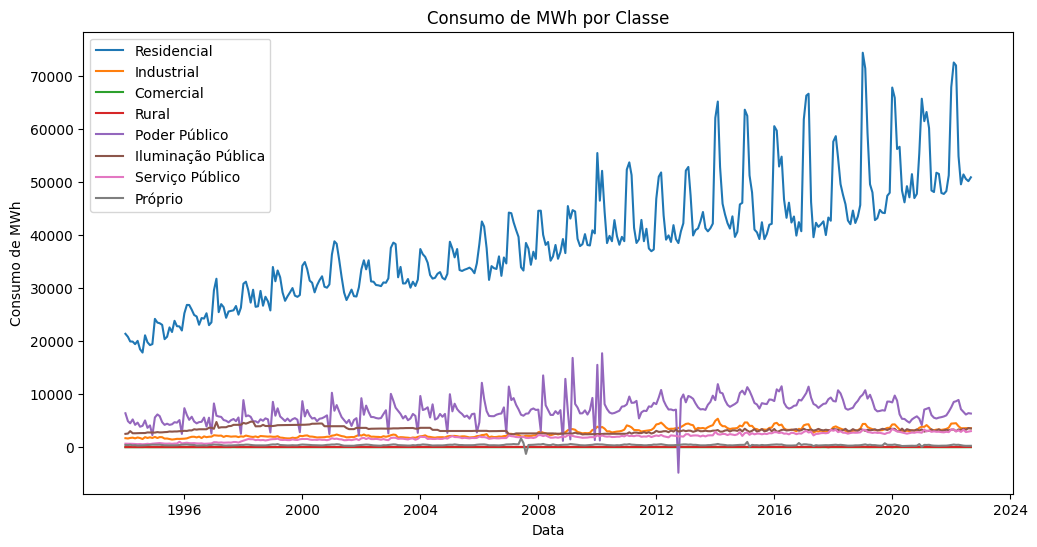

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(df_res.index, df_res['MWh'], label='Residencial')
plt.plot(df_ind.index, df_ind['MWh'], label='Industrial')
plt.plot(df_com.index, df_com['MWh'], label='Comercial')
plt.plot(df_rur.index, df_rur['MWh'], label='Rural')
plt.plot(df_pub.index, df_pub['MWh'], label='Poder Público')
plt.plot(df_ilu.index, df_ilu['MWh'], label='Iluminação Pública')
plt.plot(df_ser.index, df_ser['MWh'], label='Serviço Público')
plt.plot(df_pro.index, df_pro['MWh'], label='Próprio')

plt.title('Consumo de MWh por Classe')
plt.xlabel('Data')
plt.ylabel('Consumo de MWh')
plt.legend()
plt.show()


<font size='3'>
<div><p>A última parte no tratamento da série temporal é a normalização dos dados. Para isto utilizaremos a função <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html'>MinMaxScaler()</a> da biblioteca <a href='https://scikit-learn.org/'>scikit-learn.</a></p></div>
<div>
    <p>A normalização é um processo que transforma a escala do dado analisado da sua original, para uma escala de valores de 0 a 1.</p>
</div>

In [9]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transforma os dados
scaled = scaler.fit_transform(df_com)
# inserindo os dados normalizados no dataframe
df_com['MWh'] = scaled

In [10]:
df_com.head(10)

,MWh
Data,
1994-01-01,0.094549
1994-02-01,0.068375
1994-03-01,0.085949
1994-04-01,0.059312
1994-05-01,0.016645
1994-06-01,0.013881
1994-07-01,0.005897
1994-08-01,0.000000
1994-09-01,0.025729


# <div id="chap4">4. Análise exploratória</div>


<div><font size='4'>
<p><b>Gráfico de consumo</b></p>
</div>

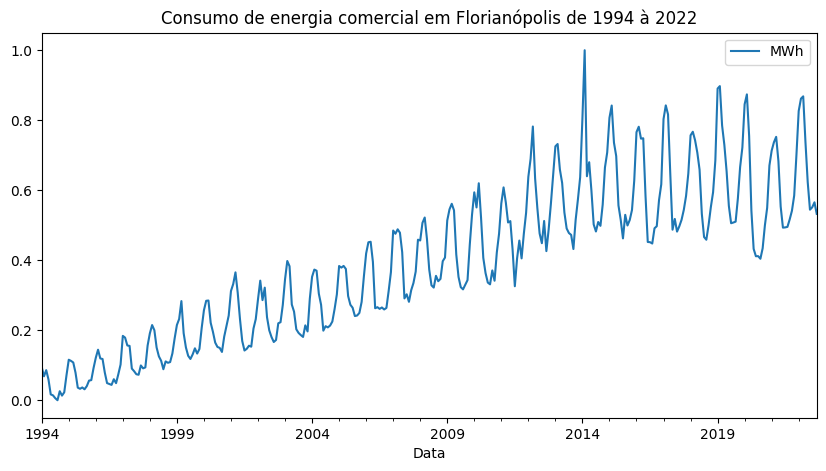

In [11]:
#Plotando o gráfico
graph = df_com.plot(figsize=(10, 5), title="Consumo de energia comercial em Florianópolis de 1994 à 2022")

<div><font size='4'><p><b>Gráficos de tendência, sazonalidade e componente residual</b></p></div>

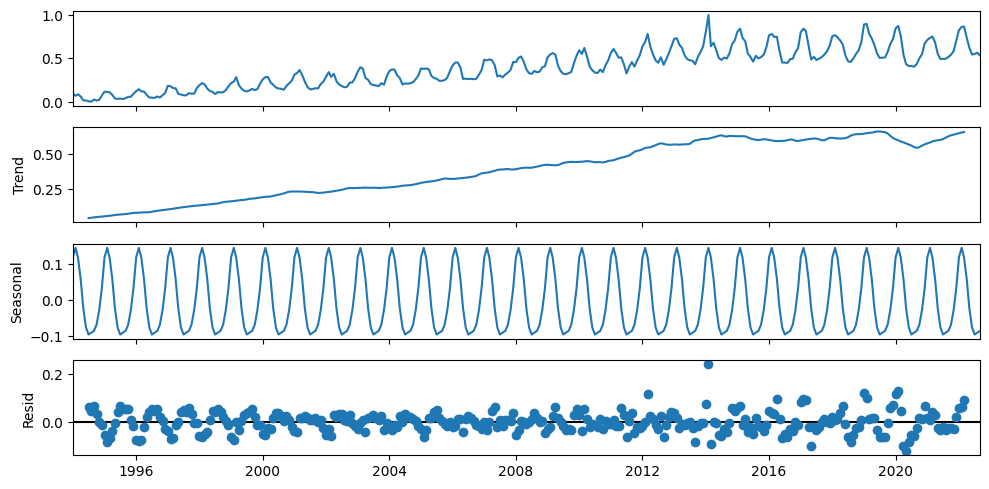

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = df_com.copy()


decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

plt.rc("figure", figsize=(10,5))
decompose_result_mult.plot();

# <div id="chap5">5. Construção do modelo LSTM</div>

<p><font size='4'><b>Long short-term memory</b></p>
<p>O LSTM, possui uma arquitetura baseada em subredes interconectadas chamadas blocos de memória. Esses blocos incluem células de memória e três portões: forget gate (para remover informações não mais úteis), input gate (para adição de informações úteis) e output gate (para extrair informações do bloco de memória).
</p>

<p><font size='3'><b>Janelamento de dados</b></p>
    <font size='3'>
<div>O janelamento permite que um conjunto de previsões com base em uma janela de amostras consecutivas dos dados seja feita.<br><br>
    
As principais características das janelas de entrada são:
   
<ul>
    <li>A largura (número de etapas de tempo) das janelas de entrada e rótulo.</li>
    <li>O deslocamento de tempo entre eles.</li>
    <li>Quais recursos são usados como entradas, rótulos ou ambos.</li>
</ul>
<p>
    No <a href='https://www.tensorflow.org/tutorials/structured_data/time_series?hl=pt-br#data_windowing'>exemplo abaixo</a>, se considerarmos em meses, temos um janelamento que recebe 100 meses de dados, tem um deslocamento de 100 e prevê 10 meses no futuro.
</p>


</div>

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from absl import logging
logging.set_verbosity(logging.ERROR)

tf.get_logger().setLevel('ERROR')

def df_to_X_y(df, window_size, future_steps):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size - future_steps + 1):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size:i + window_size + future_steps]
        y.append(label)
    return np.array(X), np.array(y)

# Exemplo de uso
train_data = df_com['MWh']
WINDOW_SIZE = 100
FUTURE_STEPS = 10

X, y = df_to_X_y(train_data, WINDOW_SIZE, FUTURE_STEPS)

# Divisão entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = Sequential()
model.add(InputLayer((WINDOW_SIZE, 1)))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(FUTURE_STEPS, activation='linear'))

model.summary()

cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp, EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10)])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 331,402
Trainable params: 331,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================]

In [28]:
# Agora, para fazer previsões
last_100_values = train_data[-WINDOW_SIZE:].to_numpy().reshape(1, WINDOW_SIZE, 1)
predicted_values = model.predict(last_100_values)

print("Previsão para os próximos 10 passos no futuro:", predicted_values[0])

1/1 [==============================] - 1s 700ms/step
Previsão para os próximos 10 passos no futuro: [0.529538   0.6085124  0.6911607  0.77733594 0.81451005 0.7924259
 0.6924779  0.60390085 0.5382569  0.5026973 ]


6/6 [==============================] - 1s 223ms/step


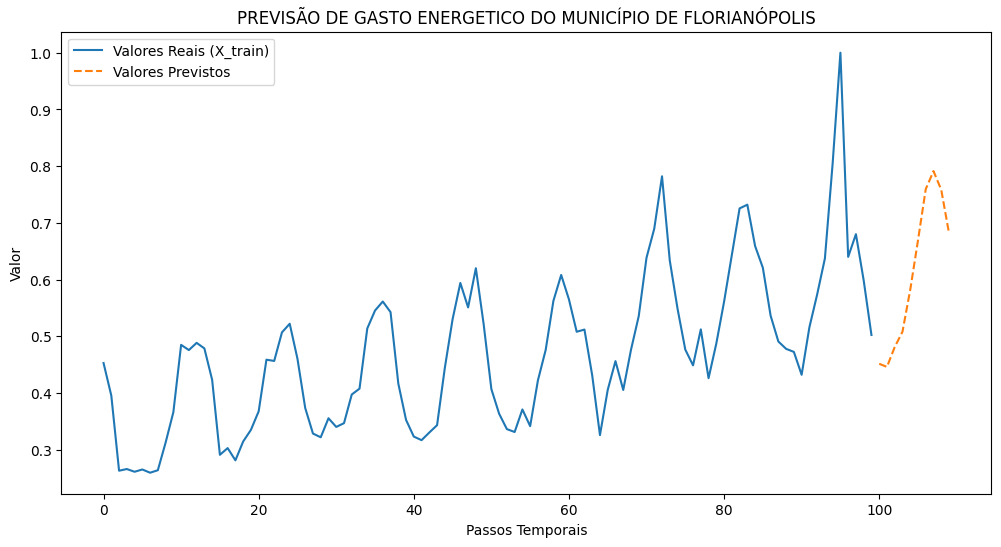

In [34]:
# Predições no conjunto de treinamento
y_train_pred = model.predict(X_train)

# Apenas uma série temporal (supondo que você está trabalhando com uma única amostra de treinamento)
sample_index = 0

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(X_train[sample_index, :, 0], label='Valores Reais (X_train)')
plt.plot(np.arange(WINDOW_SIZE, WINDOW_SIZE + FUTURE_STEPS), y_train_pred[sample_index], label='Valores Previstos', linestyle='dashed')
plt.title('PREVISÃO DE GASTO ENERGETICO DO MUNICÍPIO DE FLORIANÓPOLIS')
plt.xlabel('Passos Temporais')
plt.ylabel('Valor')
plt.legend()
plt.show()

<p><font size='4'><b>Salvando o modelo para aplicar em previsões futuras.</b></p>

In [39]:
model.save('previsao_energia.h5')